# Idea
* Scrape w czasie rzeczywistym 20% tweetow najbardziej opiniotowrczych np(Elon Musk)
* Potem czy i o ktorej kryptowalucie pisze/piszą
* Nastepnie klasyfikacja: positive/neutral/negative

* automatyczne betowanie na dana krypto albo zabieranie na gieldzie

1. najpierw elonMusk + bitcoin wykresy


[Wpisz w google kaggle bitcoin tweets](https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets/code)

In [ ]:
# Elon tweets

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ayhmrba/elon-musk-tweets-2010-2021
!mkdir ElonTweets
%cd ElonTweets
!unzip /content/elon-musk-tweets-2010-2021.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
  0% 0.00/3.77M [00:00<?, ?B/s]
100% 3.77M/3.77M [00:00<00:00, 82.6MB/s]
/content/ElonTweets
Archive:  /content/elon-musk-tweets-2010-2021.zip
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [ ]:
%cd ..
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory
!mkdir Values_2013_2021_07
%cd /content/Values_2013_2021_07
!unzip /content/cryptocurrencypricehistory.zip
%cd ..

/content
  0% 0.00/1.70M [00:00<?, ?B/s]
100% 1.70M/1.70M [00:00<00:00, 27.4MB/s]
/content/Values_2013_2021_07
Archive:  /content/cryptocurrencypricehistory.zip
  inflating: coin_Aave.csv           
  inflating: coin_BinanceCoin.csv    
  inflating: coin_Bitcoin.csv        
  inflating: coin_Cardano.csv        
  inflating: coin_ChainLink.csv      
  inflating: coin_Cosmos.csv         
  inflating: coin_CryptocomCoin.csv  
  inflating: coin_Dogecoin.csv       
  inflating: coin_EOS.csv            
  inflating: coin_Ethereum.csv       
  inflating: coin_Iota.csv           
  inflating: coin_Litecoin.csv       
  inflating: coin_Monero.csv         
  inflating: coin_NEM.csv            
  inflating: coin_Polkadot.csv       
  inflating: coin_Solana.csv         
  inflating: coin_Stellar.csv        
  inflating: coin_Tether.csv         
  inflating: coin_Tron.csv           
  inflating: coin_USDCoin.csv        
  inflating: coin_Uniswap.csv        
  inflating: coin_WrappedBitcoin.csv  
  

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import glob
import os

path = r'/content/ElonTweets' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df_tweets = pd.concat((pd.read_csv(f) for f in all_files))

In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 736
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link          

In [ ]:
df_tweets = df_tweets.reset_index(drop=True)

In [ ]:
df_bitcoin = pd.read_csv("/content/Values_2013_2021_07/coin_Bitcoin.csv") 
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
first_date_bitcoin = df_bitcoin["Date"].min()
last_date_bitcoin = df_bitcoin["Date"].max()# wystarczy uciac do 10 stringow ! [:10]
print(first_date_bitcoin, "|||||||||" , last_date_bitcoin)

2013-04-29 23:59:59 ||||||||| 2021-07-06 23:59:59


# Sortowanie po dacie



In [ ]:
df_bitcoin = df_bitcoin.sort_values(by="Date")
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [ ]:
first_date_elon_tweet = df_tweets["date"].min()
last_date_elon_tweet = df_tweets["date"].max()
print(first_date_elon_tweet, "|||||||||" , last_date_elon_tweet)

2010-06-04 18:31:57 ||||||||| 2022-03-05


In [ ]:
df_tweets["date"].min()[:10]

'2010-06-04'

In [ ]:
# PLOT date to Open course

In [ ]:
daty_plot = df_bitcoin["Date"]
daty_plot = daty_plot.str.slice(stop=10)
daty_plot

0       2013-04-29
1       2013-04-30
2       2013-05-01
3       2013-05-02
4       2013-05-03
           ...    
2986    2021-07-02
2987    2021-07-03
2988    2021-07-04
2989    2021-07-05
2990    2021-07-06
Name: Date, Length: 2991, dtype: object

In [ ]:
wartosc = df_bitcoin["Open"]
wartosc

0         134.444000
1         144.000000
2         139.000000
3         116.379997
4         106.250000
            ...     
2986    33549.600177
2987    33854.421362
2988    34665.564866
2989    35284.344430
2990    33723.509655
Name: Open, Length: 2991, dtype: float64

https://morioh.com/p/665bb1d42d40
plot open and close w kazydm dniu spoko

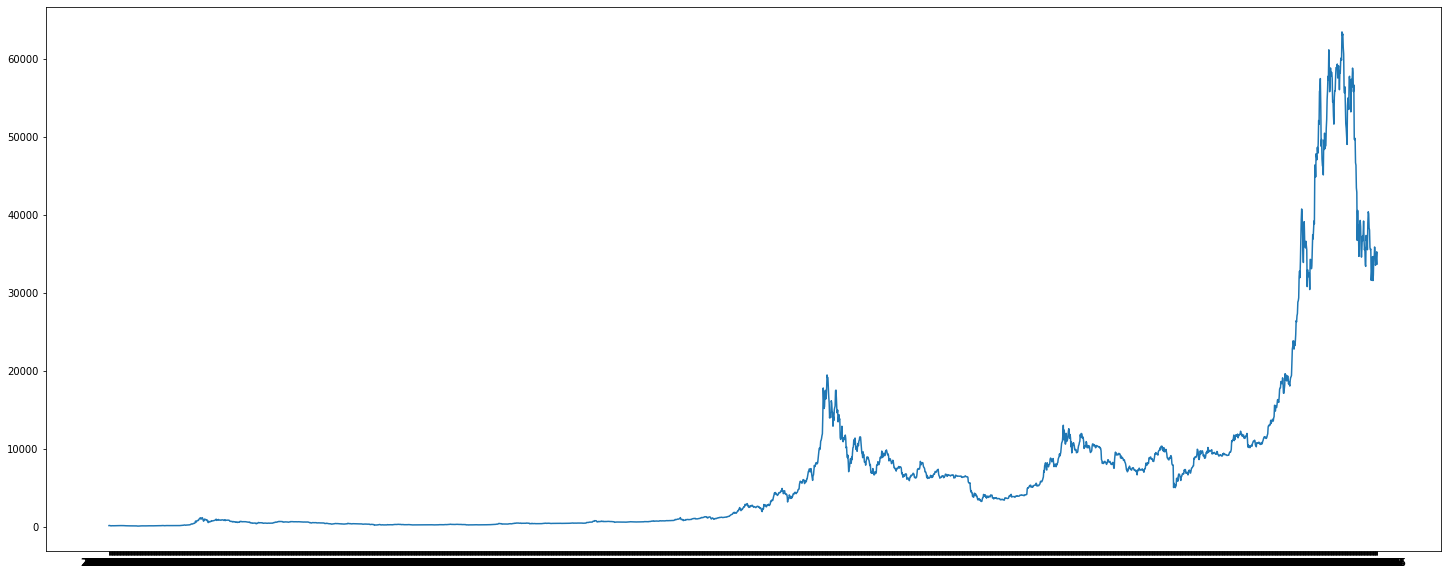

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.plot(daty_plot, wartosc)


In [ ]:
# find elon musk tweets about bitcoin

In [ ]:
tweets_elon = df_tweets[['date','tweet']]
tweets_elon.date = tweets_elon.date.str[:10]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
tweets_elon

,date,tweet
0,2016-12-24,Deus ex machina on the center screen when it ends
1,2016-12-24,@quipme Occasional existential dread is inevit...
2,2016-12-24,"@djsearle @FredericLambert Yes, grid won't be ..."
3,2016-12-24,@FredericLambert A mere 350 kW ... what are yo...
4,2016-12-24,@yamenalhaddad Brain is full right now and tha...
...,...,...
34873,2011-12-03,That was a total non sequitur btw
34874,2011-12-03,"Great Voltaire quote, arguably better than Twa..."
34875,2011-12-01,I made the volume on the Model S http://t.co/...
34876,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in tweets_elon.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
tweets_elon['tweet'] = new
tweets_elon



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,tweet
0,2016-12-24,Deus ex machina on the center screen when it ends
1,2016-12-24,Occasional existential dread is inevitable if ...
2,2016-12-24,"Yes, grid won't be needed for moderate use Sup..."
3,2016-12-24,"A mere 350 kW ... what are you referring to, a..."
4,2016-12-24,Brain is full right now and that's a hard one
...,...,...
34873,2011-12-03,That was a total non sequitur btw
34874,2011-12-03,"Great Voltaire quote, arguably better than Twa..."
34875,2011-12-01,I made the volume on the Model S go to 11. Now...
34876,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
# Pick Tweets about Bitcoin
Elon_bitcoin = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(tweets_elon)):
    cur = tweets_elon.loc[i].tweet
    cur = cur.lower()
    if 'bitc' in cur or "BTC" in cur:
        Elon_bitcoin = Elon_bitcoin.append({'Date' : tweets_elon.loc[i].date, 'Tweet' : tweets_elon.loc[i].tweet}, 
                ignore_index = True)

Elon_bitcoin['Date'] = pd.to_datetime(Elon_bitcoin['Date'], format='%Y-%m-%d')
Elon_bitcoin = Elon_bitcoin.drop_duplicates()

In [ ]:
Elon_bitcoin

,Date,Tweet
0,2018-10-22,Wanna buy some Bitcoin? 😉😉
1,2020-12-20,Bitcoin is almost as bs as fiat money
2,2020-12-20,Bitcoin is my safe word
3,2020-11-16,🎶 Toss a bitcoin to ur Witcher 🎶
4,2020-05-15,I still only own 0.25 Bitcoins btw
5,2020-05-15,"Pretty much, although massive currency issuanc..."
6,2020-05-01,How much for some anime Bitcoin?
7,2020-01-10,Bitcoin is *not* my safe word
9,2021-11-20,Bitcoin cures cancer
10,2021-10-24,"Out of curiosity, I acquired some ascii hash s..."


In [ ]:
print(Elon_bitcoin["Tweet"][10])

Out of curiosity, I acquired some ascii hash strings called “Bitcoin, Ethereum &amp; Doge”. That’s it. As I’ve said before, don’t bet the farm on crypto! True value is building products &amp; providing services to your fellow human beings, not money in any form.


In [ ]:
'''
Od 2020-12-20
Do 2021-02-19	
'''


bitcoin_musk_dates = daty_plot.loc[(daty_plot >= '2020-12-10')
                     & (daty_plot < '2021-07-06')]
bitcoin_musk_values = wartosc.loc[(wartosc.index >= 2782)
                     & (wartosc.index < 2990)]

print((bitcoin_musk_dates))
print((bitcoin_musk_values))

2782    2020-12-10
2783    2020-12-11
2784    2020-12-12
2785    2020-12-13
2786    2020-12-14
           ...    
2985    2021-07-01
2986    2021-07-02
2987    2021-07-03
2988    2021-07-04
2989    2021-07-05
Name: Date, Length: 208, dtype: object
2782    18553.299728
2783    18263.929255
2784    18051.319990
2785    18806.766479
2786    19144.492460
            ...     
2985    35035.982712
2986    33549.600177
2987    33854.421362
2988    34665.564866
2989    35284.344430
Name: Open, Length: 208, dtype: float64


In [ ]:
def get_tweets_dates(df=Elon_bitcoin['Date']):
    processed_tweet_dates = []
    for date in df:
        date = str(date)
        date = date[:10]
        processed_tweet_dates.append(date)
    return processed_tweet_dates

processed_tweet_dates = get_tweets_dates()
processed_tweet_dates = processed_tweet_dates[1:]
processed_tweet_dates

['2020-12-20',
 '2020-12-20',
 '2020-11-16',
 '2020-05-15',
 '2020-05-15',
 '2020-05-01',
 '2020-01-10',
 '2021-11-20',
 '2021-10-24',
 '2021-10-24',
 '2021-07-29',
 '2021-06-25',
 '2021-06-25',
 '2021-06-25',
 '2021-06-25',
 '2021-06-13',
 '2021-06-04',
 '2021-05-24',
 '2021-05-21',
 '2021-05-17',
 '2021-05-16',
 '2021-05-16',
 '2021-05-13',
 '2021-04-27',
 '2021-03-24',
 '2021-03-24',
 '2021-03-24',
 '2021-03-12',
 '2021-02-19',
 '2021-02-19']

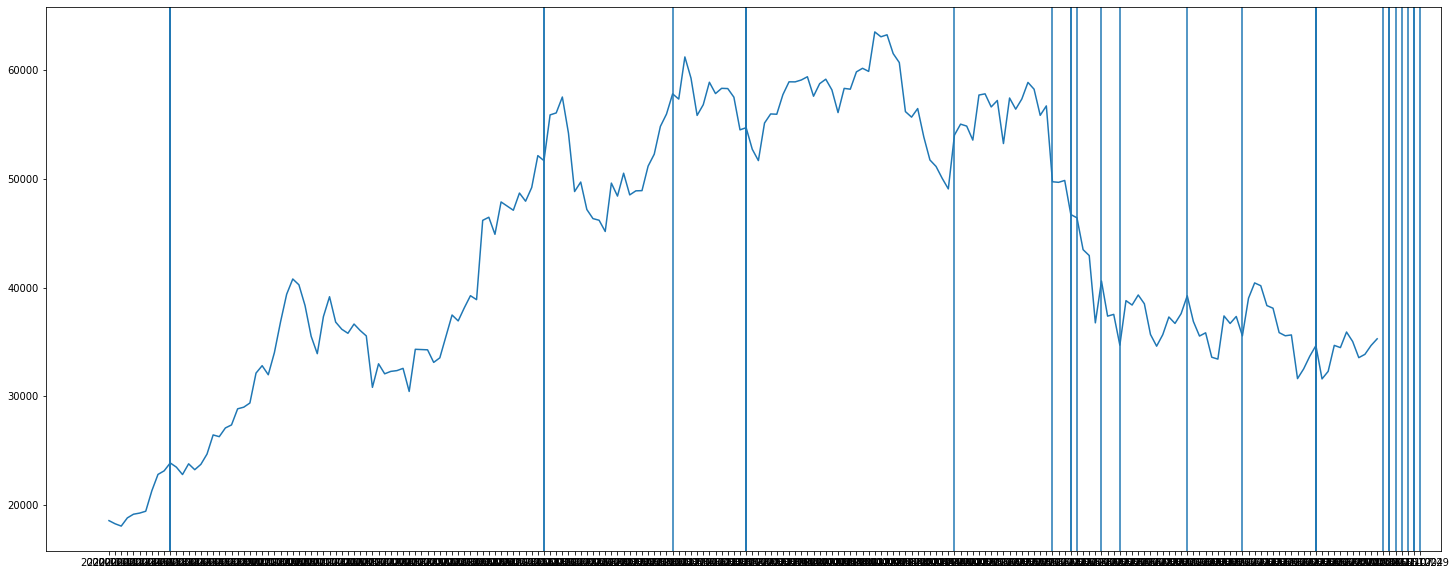

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
#plt.set_title("Bitcoin Musk Tweets")
plt.plot(bitcoin_musk_dates, bitcoin_musk_values)

for date in processed_tweet_dates:
    plt.axvline(date)
plt.axvline('2020-12-20')


# Sentimental Analysis

In [ ]:
text = "Out of curiosity, I acquired some ascii hash strings called “Bitcoin, Ethereum &amp; Doge”. That’s it. As I’ve said before, don’t bet the farm on crypto! True value is building products &amp; providing services to your fellow human beings, not money in any form."
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) neutral 0.4828
2) positive 0.476
3) negative 0.0412


# Kazdy z tweetow dac do sentimental analysis

1. dat plot poprawic
2. kolory na plot:
* czerwony negative 
* niebieski neutral
* zielony positive

# ! lepsza baza danych price bitocin

In [ ]:
!cp /content/drive/MyDrive/projects/bitcoin_data/Bitcoin_Historical_Data.csv .

In [ ]:
import pandas as pd

In [ ]:
df_bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 15, 2022","21,177.8","22,137.5","22,254.6","20,125.8",221.92K,-4.42%
1,"Jun 14, 2022","22,157.3","22,449.1","23,200.3","20,860.9",251.01K,-1.29%
2,"Jun 13, 2022","22,448.0","26,606.3","26,857.6","22,006.3",379.26K,-15.63%
3,"Jun 12, 2022","26,606.3","28,404.0","28,534.8","26,606.3",120.02K,-6.33%
4,"Jun 11, 2022","28,403.4","29,083.3","29,426.6","28,161.8",82.92K,-2.34%
...,...,...,...,...,...,...,...
557,"Dec 05, 2020","19,146.5","18,657.5","19,172.7","18,507.1",59.44K,2.62%
558,"Dec 04, 2020","18,658.1","19,431.1","19,529.5","18,610.8",110.63K,-3.99%
559,"Dec 03, 2020","19,433.3","19,219.8","19,596.6","18,883.7",99.97K,1.12%
560,"Dec 02, 2020","19,218.8","18,767.9","19,335.5","18,346.7",91.92K,2.39%


In [ ]:
df_bitcoin = pd.read_csv("/content/Bitcoin_Historical_Data.csv") 
df_bitcoin = df_bitcoin.drop(["Price", "High", "Low", "Vol.", "Change %"], axis=1)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.sort_values('Date', inplace=True)
df_bitcoin['Open'] = df_bitcoin['Open'].str[:-2]

In [ ]:
df_bitcoin['Open']  = df_bitcoin['Open'] .str.replace(',','')
df_bitcoin['Open'] 

561    19697
560    18767
559    19219
558    19431
557    18657
       ...  
4      29083
3      28404
2      26606
1      22449
0      22137
Name: Open, Length: 562, dtype: object

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 29.5 MB/s 
     |████████████████████████████████| 6.6 MB 44.2 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 101 kB 10.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 16.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime

In [25]:
start = datetime.datetime(2018,10,20)
end = datetime.datetime(2022,6,14)
df = pdr.DataReader('BTC-USD','yahoo',start,end)

In [5]:
import plotly.offline as py # since we want to plot our chart in our Notebook,
import plotly.graph_objs as go # responsible for creating the graphic itself. 

In [6]:
# The next step is to run the code below to display the plot inside the notebook.
py.init_notebook_mode(connected=True)

In [26]:
data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

In [8]:
df.index

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10',
               ...
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13',
               '2022-06-14', '2022-06-15'],
              dtype='datetime64[ns]', name='Date', length=562, freq=None)

In [9]:
py.init_notebook_mode(connected=True)

data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

layout = go.Layout(title='Bitcoin Candlestick with Range Slider and Selectors',
                  xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1w',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)
def add_tweets_lines():
    return
fig.add_shape(type='line',
                x0="2021-06-11",
                y0=0,
                x1="2021-06-11",
                y1=80000,
                line=dict(color='Red',),
                xref='x',
                yref='y'
)
fig.show(renderer="colab")

In [10]:
# Elon tweets

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ayhmrba/elon-musk-tweets-2010-2021
!mkdir ElonTweets
%cd ElonTweets
!unzip /content/elon-musk-tweets-2010-2021.zip


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
  0% 0.00/3.77M [00:00<?, ?B/s]
100% 3.77M/3.77M [00:00<00:00, 212MB/s]
/content/ElonTweets
Archive:  /content/elon-musk-tweets-2010-2021.zip
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [11]:
# elon tweets

import pandas as pd
import glob
import os

path = r'/content/ElonTweets' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df_tweets = pd.concat((pd.read_csv(f) for f in all_files))

tweets_elon = df_tweets[['date','tweet']]
tweets_elon.date = tweets_elon.date.str[:10]

#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in tweets_elon.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
tweets_elon['tweet'] = new
tweets_elon = tweets_elon.reset_index(drop=True)

Elon_bitcoin = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(tweets_elon)):
    cur = tweets_elon.loc[i].tweet
    #print(type(cur))
    #print(cur)
    #print(f'i: {i}')
    if type(cur) is not str:
        cur = cur.str.lower()
    else:
        cur = cur.lower()
    if 'bitc' in cur or "BTC" in cur:
        Elon_bitcoin = Elon_bitcoin.append({'Date' : tweets_elon.loc[i].date, 'Tweet' : tweets_elon.loc[i].tweet}, 
                ignore_index = True)

Elon_bitcoin['Date'] = pd.to_datetime(Elon_bitcoin['Date'], format='%Y-%m-%d')
Elon_bitcoin = Elon_bitcoin.drop_duplicates()

Elon_bitcoin

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Tweet
0,2021-11-20,Bitcoin cures cancer
1,2021-10-24,"Out of curiosity, I acquired some ascii hash s..."
2,2021-10-24,Possibly. Bitcoin was conceived at a time of r...
3,2021-07-29,"We don’t have that many Bitcoin, but it’s close"
4,2021-06-25,"For the Bitcurious? Very well then, let’s do it 😉"
5,2021-06-25,“That’s not funny!” – Bitcoin maxis
6,2021-06-25,How many Bitcoin maxis does it take to screw i...
7,2021-06-25,Oh right … Bitcoin haha
8,2021-06-13,This is inaccurate. Tesla only sold ~10% of ho...
9,2021-06-04,#Bitcoin 💔


In [13]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

text = "Bitcoin is my safe word"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# # TF
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

1) positive 0.609
2) neutral 0.3822
3) negative 0.0088


In [15]:
def find_tweet_sentiment(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]

    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        break
    return (l,np.round(float(s), 4))

sentiment = []
for i in range(len(Elon_bitcoin)):
    tweet = Elon_bitcoin.loc[i].Tweet
    label, score = find_tweet_sentiment(tweet)
    sentiment.append(label)

    

In [18]:
sentiment # zjebalo sie

['positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral']

In [21]:
Elon_bitcoin['sentiment'] = sentiment

In [22]:
Elon_bitcoin

,Date,Tweet,sentiment
0,2021-11-20,Bitcoin cures cancer,positive
1,2021-10-24,"Out of curiosity, I acquired some ascii hash s...",neutral
2,2021-10-24,Possibly. Bitcoin was conceived at a time of r...,positive
3,2021-07-29,"We don’t have that many Bitcoin, but it’s close",neutral
4,2021-06-25,"For the Bitcurious? Very well then, let’s do it 😉",positive
5,2021-06-25,“That’s not funny!” – Bitcoin maxis,negative
6,2021-06-25,How many Bitcoin maxis does it take to screw i...,neutral
7,2021-06-25,Oh right … Bitcoin haha,neutral
8,2021-06-13,This is inaccurate. Tesla only sold ~10% of ho...,neutral
9,2021-06-04,#Bitcoin 💔,negative


In [27]:
py.init_notebook_mode(connected=True)

data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

layout = go.Layout(title='Bitcoin Candlestick with Range Slider and Selectors',
                  xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1w',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)

for i in range(len(Elon_bitcoin)):
    date = Elon_bitcoin.loc[i].Date
    sentiment = Elon_bitcoin.loc[i].sentiment
    if sentiment == "negative":
        color = 'Red'
    elif sentiment == "neutral":
        color = "Blue"
    elif sentiment == "positive":
        color = "Green"
    else: raise ValueError  
    fig.add_shape(type='line',
                    x0=str(date),
                    y0=0,
                    x1=str(date),
                    y1=80000,
                    line=dict(color=color,),
                    xref='x',
                    yref='y'
    )
fig.show(renderer="colab")

In [50]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import glob
import os

def get_actions_value(company_name="TSLA", start_date=(2018,10,20), end_date=(2022,6,14)):
    '''
    company_name: ==>>> Get comapny name from yahoofinance e.g. for Tesla name is TSLA
    dates: format (year, month, day) 
    '''
    start_year, start_month, start_day = start_date
    end_year, end_month, end_day = end_date
    start = datetime.datetime(start_year, start_month, start_day)
    end = datetime.datetime(end_year, end_month, end_day)
    df = pdr.DataReader(company_name,'yahoo',start,end)
    return df

def get_tweets(name):
    '''
    name e.g. bitcoin or tesla (company name) {type: string}
    '''
    path = r'/content/ElonTweets' # use your path
    all_files = glob.glob(os.path.join(path, "*.csv"))

    df_tweets = pd.concat((pd.read_csv(f) for f in all_files))

    tweets_elon = df_tweets[['date','tweet']]
    tweets_elon.date = tweets_elon.date.str[:10]

    #Lets clean the tweets (remove @'s' and urls and)
    TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    new = []
    for t in tweets_elon.tweet:
        words = t.split()
        t = t.split()
        t = ' '.join(word for word in t if not word.startswith('@'))
        t = t.split()
        t = ' '.join(word for word in t if not word.startswith('http'))
        new.append(t)
        
    tweets_elon['tweet'] = new
    tweets_elon = tweets_elon.reset_index(drop=True)

    Elon_tweets = pd.DataFrame(columns = ['Date', 'Tweet'])
    print(tweets_elon)

    name = name.lower()
    for i in range(len(tweets_elon)):
        cur = tweets_elon.loc[i].tweet
        #print(type(cur))
        #print(cur)
        #print(f'i: {i}')
        if type(cur) is not str:
            cur = cur.str.lower()
        else:
            cur = cur.lower()
        if "tesla" in cur:
            print(cur)
            Elon_tweets = Elon_tweets.append({'Date' : tweets_elon.loc[i].date, 'Tweet' : tweets_elon.loc[i].tweet}, 
                    ignore_index = True)

    Elon_tweets['Date'] = pd.to_datetime(Elon_tweets['Date'], format='%Y-%m-%d')
    Elon_tweets = Elon_tweets.drop_duplicates()
    print(Elon_tweets)
    return Elon_tweets

df = get_actions_value()
tweets = get_tweets("TEsLa")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



             date                                              tweet
0      2021-12-31                                               🤣 $7
1      2021-12-31                        Many UI improvements coming
2      2021-12-31                           This chart is a big deal
3      2021-12-30  Predicting macroeconomics is challenging, to s...
4      2021-12-30  If history is any guide, not many will make it...
...           ...                                                ...
34873  2022-01-03                                                   
34874  2022-01-02                Let’s make the roaring 20’s happen!
34875  2022-01-02                Great work by Tesla team worldwide!
34876  2022-01-01                                                  🔥
34877  2022-01-01                                                  🤣

[34878 rows x 2 columns]
ashok was the first person recruited from my tweet saying that tesla is starting an autopilot team!
or tesla!
that was a crazy tough year. tesla f

In [37]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-22,52.372002,50.518002,52.136002,52.189999,28001500.0,52.189999
2018-10-23,59.585999,52.419998,52.773998,58.827999,95139000.0,58.827999
2018-10-24,60.888000,57.146000,60.209999,57.700001,100291500.0,57.700001
2018-10-25,64.199997,60.202000,63.444000,62.972000,104203500.0,62.972000
2018-10-26,67.980003,61.330002,61.650002,66.180000,137127500.0,66.180000
...,...,...,...,...,...,...
2022-06-08,749.890015,717.530029,720.260010,725.599976,25403500.0,725.599976
2022-06-09,766.640015,717.979980,748.020020,719.119995,32163800.0,719.119995
2022-06-10,718.500000,683.739990,705.469971,696.690002,32512200.0,696.690002


In [55]:
tweets = tweets.reset_index(drop=True)
tweets

,Date,Tweet
0,2021-12-29,Ashok was the first person recruited from my t...
1,2021-12-26,Or Tesla!
2,2021-12-25,That was a crazy tough year. Tesla financing c...
3,2021-12-24,Tesla holiday software update goes to wide rel...
4,2021-12-24,Tesla is technically a car like an iPhone is t...
...,...,...
1209,2022-01-14,Tesla merch buyable with Dogecoin
1210,2022-01-12,Tesla is working as fast as possible to suppor...
1211,2022-01-08,It was a mistake to try to use the Elise. In t...
1212,2022-01-08,Tesla FSD price rising to $12k on Jan 17


In [56]:
def find_tweet_sentiment(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]

    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        break
    return (l,np.round(float(s), 4))

sentiment = []
for i in range(len(tweets)):
    tweet = tweets.loc[i].Tweet
    label, score = find_tweet_sentiment(tweet)
    sentiment.append(label)

tweets['sentiment'] = sentiment

In [57]:
tweets

,Date,Tweet,sentiment
0,2021-12-29,Ashok was the first person recruited from my t...,positive
1,2021-12-26,Or Tesla!,neutral
2,2021-12-25,That was a crazy tough year. Tesla financing c...,negative
3,2021-12-24,Tesla holiday software update goes to wide rel...,positive
4,2021-12-24,Tesla is technically a car like an iPhone is t...,neutral
...,...,...,...
1209,2022-01-14,Tesla merch buyable with Dogecoin,neutral
1210,2022-01-12,Tesla is working as fast as possible to suppor...,positive
1211,2022-01-08,It was a mistake to try to use the Elise. In t...,neutral
1212,2022-01-08,Tesla FSD price rising to $12k on Jan 17,neutral


In [59]:
py.init_notebook_mode(connected=True)

data = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

layout = go.Layout(title='Bitcoin Candlestick with Range Slider and Selectors',
                  xaxis={'rangeselector':{'buttons':[{'count':7,
                                                      'label':'1w',
                                                      'step':'day',
                                                      'stepmode':'backward'},
                                                     {'count':1,
                                                      'label':'1m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':3,
                                                      'label':'3m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':6,
                                                      'label':'6m',
                                                      'step':'month',
                                                      'stepmode':'backward'},
                                                    {'count':1,
                                                      'label':'1y',
                                                      'step':'year',
                                                      'stepmode':'backward'},
                                                      ]
                          },
                         'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)

for i in range(len(tweets)):
    date = tweets.loc[i].Date
    sentiment = tweets.loc[i].sentiment
    if sentiment == "negative":
        color = 'Red'
    elif sentiment == "neutral":
        color = "Blue"
    elif sentiment == "positive":
        color = "Green"
    else: raise ValueError  
    fig.add_shape(type='line',
                    x0=str(date),
                    y0=0,
                    x1=str(date),
                    y1=1400, # Tu mniej dac xD
                    line=dict(color=color,),
                    xref='x',
                    yref='y'
    )
fig.show(renderer="colab")